In [1]:
# Import necessary libraries
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img  # Using tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [3]:
TRAIN_DIR = 'archive/train'
TEST_DIR = 'archive/test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                              image     label
0         archive/train\angry\Training_10118481.jpg     angry
1         archive/train\angry\Training_10120469.jpg     angry
2         archive/train\angry\Training_10131352.jpg     angry
3         archive/train\angry\Training_10161559.jpg     angry
4          archive/train\angry\Training_1021836.jpg     angry
...                                             ...       ...
28704  archive/train\surprise\Training_99916297.jpg  surprise
28705  archive/train\surprise\Training_99924420.jpg  surprise
28706  archive/train\surprise\Training_99937001.jpg  surprise
28707  archive/train\surprise\Training_99951755.jpg  surprise
28708  archive/train\surprise\Training_99984132.jpg  surprise

[28709 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)
print(test['image'])

                                              image     label
0       archive/test\angry\PrivateTest_10131363.jpg     angry
1       archive/test\angry\PrivateTest_10304478.jpg     angry
2        archive/test\angry\PrivateTest_1054527.jpg     angry
3       archive/test\angry\PrivateTest_10590091.jpg     angry
4        archive/test\angry\PrivateTest_1109992.jpg     angry
...                                             ...       ...
7173  archive/test\surprise\PublicTest_98089595.jpg  surprise
7174  archive/test\surprise\PublicTest_98567249.jpg  surprise
7175  archive/test\surprise\PublicTest_98972870.jpg  surprise
7176  archive/test\surprise\PublicTest_99242645.jpg  surprise
7177  archive/test\surprise\PublicTest_99446963.jpg  surprise

[7178 rows x 2 columns]
0         archive/test\angry\PrivateTest_10131363.jpg
1         archive/test\angry\PrivateTest_10304478.jpg
2          archive/test\angry\PrivateTest_1054527.jpg
3         archive/test\angry\PrivateTest_10590091.jpg
4          arch

In [9]:

from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [11]:

train_features = extract_features(train['image']) 

  0%|          | 0/28709 [00:00<?, ?it/s]

In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [15]:

le = LabelEncoder()
le.fit(train['label'])


LabelEncoder()

In [16]:

# Transform labels to integers
y_train = le.transform(train['label'])  # shape: (28709,)
y_test = le.transform(test['label'])    # shape: (7178,)


In [17]:

y_train = to_categorical(y_train, num_classes=7)  # shape: (28709, 7)
y_test = to_categorical(y_test, num_classes=7)    # shape: (7178, 7)


In [18]:

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


y_train shape: (28709, 7)
y_test shape: (7178, 7)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()
model.add(Input(shape=(48, 48, 1)))

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer for 7 emotion classes
model.add(Dense(7, activation='softmax'))


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:
print(y_train.shape) 

(28709, 7)


In [22]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

print(y_train.shape)  # (28709, 7)
print(y_test.shape)   # (7178, 7)


x_train shape: (28709, 48, 48, 1)
y_train shape: (28709, 7)
x_test shape: (7178, 48, 48, 1)
y_test shape: (7178, 7)
(28709, 7)
(7178, 7)


In [23]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))


Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 139s 605ms/step - accuracy: 0.2360 - loss: 1.8416 - val_accuracy: 0.2480 - val_loss: 1.7980
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 140s 623ms/step - accuracy: 0.2594 - loss: 1.7816 - val_accuracy: 0.2974 - val_loss: 1.7113
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 135s 601ms/step - accuracy: 0.3184 - loss: 1.6737 - val_accuracy: 0.4124 - val_loss: 1.5092
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 132s 588ms/step - accuracy: 0.3996 - loss: 1.5430 - val_accuracy: 0.4627 - val_loss: 1.4008
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 134s 593ms/step - accuracy: 0.4425 - loss: 1.4509 - val_accuracy: 0.4955 - val_loss: 1.3079
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 133s 593ms/step - accuracy: 0.4597 - loss: 1.4043 - val_accuracy: 0.5082 - val_loss: 1.2800
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 137s 608ms/step - accuracy: 0.4747 - loss: 1.3583 - val_accuracy: 0.5167 - val_loss: 1.2525
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 134s 593ms/step - accuracy: 

In [24]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [25]:
from keras.models import model_from_json

In [26]:

# Load model architecture
with open("emotiondetector.json", "r") as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)
# Load weights
loaded_model.load_weights("emotiondetector.h5")


In [27]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [28]:

def ef(image):
    img = load_img(image, color_mode='grayscale', target_size=(48, 48))
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [29]:

image = r'archive\train\sad\Training_26728.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
model prediction is  neutral


In [30]:

!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


Defaulting to user installation because normal site-packages is not writeable


original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
model prediction is  neutral


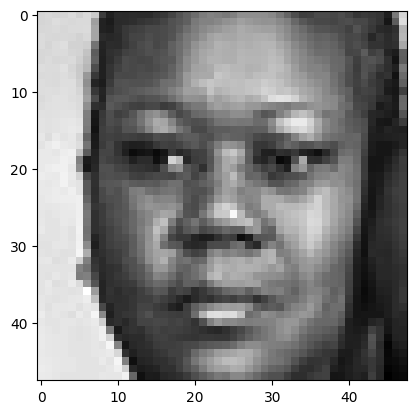

In [31]:
image = r'archive\train\sad\Training_26728.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
model prediction is  happy


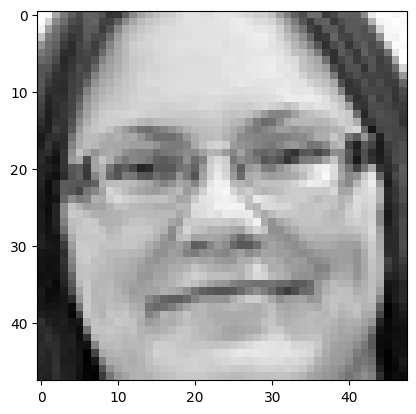

In [32]:
image = r'archive\train\happy\Training_1206.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [33]:
import torch
print("Is CUDA available?", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


Is CUDA available? True
GPU Name: NVIDIA GeForce RTX 3050 Laptop GPU


In [34]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0))


True
NVIDIA GeForce RTX 3050 Laptop GPU


In [35]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1510941000745024422
xla_global_id: -1
]
